In [28]:
#nn.module includes the blocks computational graph
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [29]:
class Net(nn.Module):#under nn_module class parameters are tracked for gradient calculation
    def __init__(self,in_layers,out_layers):
        super(Net,self).__init__()
        self.in_layers = in_layers
        self.out_layers = out_layers
        self.fc1 = nn.Linear(self.in_layers,32)
        self.fc2 = nn.Linear(32,32)
        self.fc3 = nn.Linear(32,out_layers)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
net = Net(in_layers=1,out_layers=1)

In [31]:
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


In [38]:
x = torch.ones((100,1))#whatever you enter first dimension it takes it as a batch
y = net(x)#here it means 100 in a batch and 1 input for each example 
print(y.shape)#ouput also in same format batch * num_out_layers

torch.Size([100, 1])


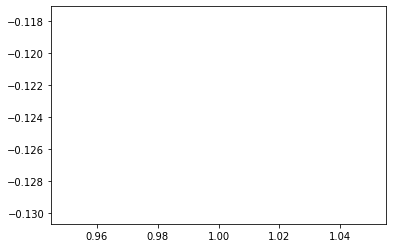

In [39]:
plt.plot(x.detach().numpy(),y.detach().numpy())

In [44]:
#from numpy to pytorch -> #torch.sigmoid / torch.relu / torch.softmax
x = np.random.randint((1,2))
print(x.dtype)
x = torch.from_numpy(x)
print(x.dtype)
#from pytorch to numpy
x = x.numpy()
print(x.dtype)

int64
torch.int64
int64


In [46]:
#gradients and backprop
X = torch.tensor([1.,2.,3.],requires_grad = True) #default value of requires_grad is False for pytorch tensor
Y = torch.ones((3,),requires_grad=True)

In [47]:
print(X)

tensor([1., 2., 3.], requires_grad=True)


In [48]:
print(X.data)#since requires grad is True here keeps track of data and grad as attribute
print(X.grad)#gradient none since not backpropagated yet

tensor([1., 2., 3.])
None


In [49]:
loss = ((X - Y)**2).sum() 

In [50]:
print(loss)

tensor(5., grad_fn=<SumBackward0>)


In [51]:
print(loss.grad_fn)

In [52]:
loss.backward()

In [53]:
print(X.grad)

tensor([0., 2., 4.])


In [54]:
print(Y.grad)

tensor([-0., -2., -4.])


In [55]:
#main thing to note is it goes on tracking the variables with requires_grad = True and
#builds a computation graph out of them whenever we do sth.backward() the var.grad of the
#variable with requires_grad=True is filled with gradient w.r.t sth

In [56]:
#another important thing to keep note of is gradients accumulate in pytorch.
#That means calling sth.backward() many times on the same computation graph is just gonna 
#the same gradient as many times as you call them
#It is mostly useful when you have many loss functions as depending on the same variable 
#and when you backpropagate you wanna make sure that the gradients from both the loss 
#functions are considered by the variable on the computation graph.
#you can do this by calling loss.backward() and other_loss.backward() 

In [57]:
#what if you want to perform a calculation with the variable whose requires_gradient = True
#but you want want it to be in the computation graph for gradient calculation
print(X)

tensor([1., 2., 3.], requires_grad=True)


In [58]:
print(X.detach())#see the difference 

tensor([1., 2., 3.])


In [60]:
print(X.detach().grad)#see no grad tracked for this; you can use this for prediction
print(X.grad)

None
tensor([0., 2., 4.])


In [61]:
#but X.detach() and X use the same memory space so mutating X.detach() mutates X whose 
#gradients are tracked so performing mutating operation on X.detach() pops err 
#to use a different memory location completely we can do X.detach().clone()
X_detached = X.detach().clone()

In [63]:
for name,p in net.named_parameters():
    print(name,p.shape)

fc1.weight torch.Size([32, 1])
fc1.bias torch.Size([32])
fc2.weight torch.Size([32, 32])
fc2.bias torch.Size([32])
fc3.weight torch.Size([1, 32])
fc3.bias torch.Size([1])


In [64]:
for p in net.parameters():
    print(p.shape)

torch.Size([32, 1])
torch.Size([32])
torch.Size([32, 32])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [70]:
X = torch.from_numpy(np.random.randn(1000,1)).to(torch.float32)
Y_target = torch.sin(X)

In [71]:
for _ in range(1000):
    Y = net(X)
    loss = ((Y_target - Y)**2).sum()
    loss.backward()
    for p in net.parameters():
        p.data.add_(-0.001 * p.grad)
    p.grad.data.zero_()

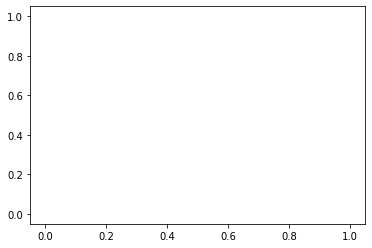

In [73]:
Y = net(X)
plt.plot(X.detach().numpy(),Y.detach().numpy())

In [75]:
#the same thing done in a more general way
x = torch.linspace(-5,5,100).view(-1,1)
y_target = torch.sin(x)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(),lr=1e-3)

In [78]:
for _ in range(1000):
    y = net(x)
    loss = loss_fn(y,y_target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n

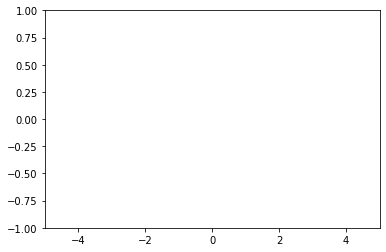

In [83]:
print(y)
plt.plot(x.detach().numpy(),y.detach().numpy())
plt.xlim([-5,5])
plt.ylim([-1,1])
plt.show()

In [84]:
#availabiltiy of GPU and its use is easy in pytorch
print(torch.cuda.is_available())

False


In [85]:
device = torch.device("cuda")

In [86]:
torch.ones((2,3),device=device)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
#In order to perform operations in the variables all of them must defined using same thing 
#i.e both CPU or GPU
device = torch.device("cuda")
x = torch.ones((2,3),device = device) #defined x in GPU
y = torch.ones((2,3)) #defined on CPU
Z = x + y #err because both are not defined for same machine
#we can do
y = y.to(device)
Z = x + y #now on same devi
ce

#OR
Z = x.to("cpu") + y.to("cpu")#taking both to CPU
#you can move your evrything to GPU to work faster 
net = net.to(device)
y_target = y_target.to(device)

In [ ]:
#cannot convert directly from gpu to numpy or numpy to gpu
#first numpy to cpu to GPU
#OR GPU to cpu to numpy
X = X.to("cpu").numpy()
X = X.to("cpu").to(device)

In [ ]:
net.eval()#changes the mode of the net from training to evaluation mode
#is helpful when we have performed dropout and batchnorm during training which we don't perform
#test time
with torch.no_grad():#means keep no track of grad below this requires_grad = False
    y = net(x)
    #had we not made requires_grad False it wouldn't matter here But its a good idea to follow
    
    

In [1]:
#to save the weights and biases for future prediction
path = "checkpoint.pt"#save the path of the file for saving the weights and biases
torch.save(net.state_dict(),path)

#now load this parameters into the new model
newModel = Net(1,1)
newModel.load_state_dict(torch.load(path))
newModel.eval()

NameError: name 'torch' is not defined